# Hands-On Pertemuan 1: Pengenalan Big Data dan Overview Teknologi

## Tujuan
Pada akhir praktikum ini, mahasiswa diharapkan mampu:
1. Memahami konsep dasar Big Data.
2. Menjelaskan karakteristik dan tantangan Big Data (Volume, Variety, Velocity, dan Veracity).
3. Mengenal teknologi yang digunakan dalam ekosistem Big Data.
4. Menginstal dan mengonfigurasi Anaconda untuk bekerja dengan alat Big Data seperti Hadoop dan Spark.
5. Memulai praktik sederhana terkait pengolahan data menggunakan PySpark dan Pandas.

## Peralatan yang Dibutuhkan
1. Anaconda (untuk manajemen lingkungan)
2. Jupyter Notebook (bawaan dari Anaconda)
3. PySpark (untuk pemrosesan data skala besar)
4. Pandas (untuk data analysis)
5. Python (bawaan dari Anaconda)

## Langkah-Langkah Hands-On

### 1. Instalasi Anaconda
- **Langkah 1: Unduh dan Instal Anaconda**
  Anaconda adalah platform distribusi Python yang menyertakan berbagai alat pengembangan, termasuk Jupyter Notebook. Ikuti langkah-langkah instalasi sesuai sistem operasi:
  - Unduh Anaconda: [Download Anaconda](https://www.anaconda.com/products/individual)
  - Instal sesuai instruksi yang ada di situs web tersebut (Windows/Mac/Linux).

- **Langkah 2: Menginstal PySpark di Anaconda**
  Setelah Anaconda terinstal, tambahkan PySpark:
  ```bash
  pip install pyspark==3.4.1
  ```

- **Langkah 3: Menginstal Pandas**
  Untuk memudahkan data analysis, install Pandas:
  ```bash
  pip install pandas
  ```

- **Langkah 4: Menginstal Findspark**
  ```bash
  pip install findspark
  ```

### 2. Pengenalan dan Praktik Dasar PySpark dan Pandas
- **Langkah 1: Membuka Jupyter Notebook**
  Setelah instalasi selesai, buka Jupyter Notebook melalui Anaconda Navigator atau melalui terminal dengan perintah:
  ```bash
  jupyter notebook
  ```

- **Langkah 2: Membuat Project Notebook Baru**
  Di Jupyter Notebook, buat notebook baru untuk praktikum ini.

- **Langkah 3: Praktik dengan PySpark**
  Buat program sederhana untuk memulai dengan PySpark. Gunakan PySpark untuk membuat DataFrame dan memanipulasi data sederhana:

In [1]:
import findspark
findspark.init()

- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [19]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "PNS", "Renang", "Pria"), ("Budi", 23,"Atlit", "Lari", "Pria"), ("Citra", 29,"Guru", "Hiking", "Wanita"), ("Dina", 45,"Freelancer", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+----------+--------+------+
| Nama|Usia| Pekerjaan|    Hobi|Gender|
+-----+----+----------+--------+------+
|  Ali|  34|       PNS|  Renang|  Pria|
| Budi|  23|     Atlit|    Lari|  Pria|
|Citra|  29|      Guru|  Hiking|Wanita|
| Dina|  45|Freelancer|Berkebun|Wanita|
+-----+----+----------+--------+------+




1. **Memulai Spark Session**:  
   - `SparkSession.builder.appName("BigDataPractice").getOrCreate()` - Membuat dan mengonfigurasi sesi Spark dengan nama aplikasi "BigDataPractice".

2. **Membuat DataFrame**:  
   - Data: Daftar tuple berisi data individu dengan informasi nama, usia, pekerjaan, hobi, dan gender.  
   - Kolom: Daftar nama kolom yang sesuai dengan data.

3. **Menampilkan DataFrame**:  
   - `df.show()` - Menampilkan DataFrame di console dengan format tabular.t tabular.

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, when

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana dengan dua kolom
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menambahkan kolom "Pekerjaan"
df = df.withColumn("Pekerjaan", when(df["Nama"] == "Ali", "PNS")
                                .when(df["Nama"] == "Budi", "Atlit")
                                .when(df["Nama"] == "Citra", "Guru")
                                .when(df["Nama"] == "Dina", "Freelancer"))
df.show()

# Menambahkan kolom "Hobi"
df = df.withColumn("Hobi", when(df["Nama"] == "Ali", "Renang")
                            .when(df["Nama"] == "Budi", "Lari")
                            .when(df["Nama"] == "Citra", "Hiking")
                            .when(df["Nama"] == "Dina", "Berkebun"))
df.show()

# Menambahkan kolom "Gender"
df = df.withColumn("Gender", when(df["Nama"] == "Ali", "Pria")
                              .when(df["Nama"] == "Budi", "Pria")
                              .when(df["Nama"] == "Citra", "Wanita")
                              .when(df["Nama"] == "Dina", "Wanita"))

# Menampilkan DataFrame akhir
df.show()



+-----+----+----------+
| Nama|Usia| Pekerjaan|
+-----+----+----------+
|  Ali|  34|       PNS|
| Budi|  23|     Atlit|
|Citra|  29|      Guru|
| Dina|  45|Freelancer|
+-----+----+----------+

+-----+----+----------+--------+
| Nama|Usia| Pekerjaan|    Hobi|
+-----+----+----------+--------+
|  Ali|  34|       PNS|  Renang|
| Budi|  23|     Atlit|    Lari|
|Citra|  29|      Guru|  Hiking|
| Dina|  45|Freelancer|Berkebun|
+-----+----+----------+--------+

+-----+----+----------+--------+------+
| Nama|Usia| Pekerjaan|    Hobi|Gender|
+-----+----+----------+--------+------+
|  Ali|  34|       PNS|  Renang|  Pria|
| Budi|  23|     Atlit|    Lari|  Pria|
|Citra|  29|      Guru|  Hiking|Wanita|
| Dina|  45|Freelancer|Berkebun|Wanita|
+-----+----+----------+--------+------+




1. **Memulai Spark Session**:  
   - `SparkSession.builder.appName("BigDataPractice").getOrCreate()` - Membuat dan mengonfigurasi sesi Spark.

2. **Membuat DataFrame Awal**:  
   - `data`: Daftar tuple dengan nama dan usia.  
   - `columns`: "Nama" dan "Usia".

3. **Menambahkan Kolom "Pekerjaan"**:  
   - Menggunakan fungsi `when` untuk menetapkan nilai pekerjaan berdasarkan nama.

4. **Menambahkan Kolom "Hobi"**:  
   - Menggunakan fungsi `when` untuk menetapkan nilai hobi berdasarkan nama.

5. **Menambahkan Kolom "Gender"**:  
   - Menggunakan fungsi `when` untuk menetapkan nilai gender berdasarkan nama.

6. **Menampilkan DataFrame Akhir**:  
   - `df.show()` - Menampilkan DataFrame setelah semua kolom tambahan ("Pekerjaan", "Hobi", dan "Gender") ditambahkan.

### 3. Praktik PySpark Lanjutan
- **Latihan 1**: Memanipulasi Data dengan PySpark.

- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "PNS", "Renang", "Pria"), 
        ("Budi", 23, "Atlit", "Lari", "Pria"), 
        ("Citra", 29, "Guru", "Hiking", "Wanita"), 
        ("Dina", 45, "Freelancer", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame asli
print("DataFrame asli:")
df.show()

# Filtering data (Usia > 30)
df_filtered = df.filter(df['Usia'] > 30)
print("Data setelah difilter (Usia > 30):")
df_filtered.show()

# Menghitung rata-rata usia
print("Rata-rata Usia:")
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan Nama
print("Data diurutkan berdasarkan Nama (ascending):")
df_sorted_by_nama = df.orderBy("Nama", ascending=True)
df_sorted_by_nama.show()

# Mengurutkan data berdasarkan Usia
print("Data diurutkan berdasarkan Usia (ascending):")
df_sorted_by_usia = df.orderBy("Usia", ascending=True)
df_sorted_by_usia.show()

# Mengurutkan data berdasarkan Pekerjaan
print("Data diurutkan berdasarkan Pekerjaan (ascending):")
df_sorted_by_pekerjaan = df.orderBy("Pekerjaan", ascending=True)
df_sorted_by_pekerjaan.show()

# Mengurutkan data berdasarkan Hobi
print("Data diurutkan berdasarkan Hobi (ascending):")
df_sorted_by_hobi = df.orderBy("Hobi", ascending=True)
df_sorted_by_hobi.show()


DataFrame asli:
+-----+----+----------+--------+------+
| Nama|Usia| Pekerjaan|    Hobi|Gender|
+-----+----+----------+--------+------+
|  Ali|  34|       PNS|  Renang|  Pria|
| Budi|  23|     Atlit|    Lari|  Pria|
|Citra|  29|      Guru|  Hiking|Wanita|
| Dina|  45|Freelancer|Berkebun|Wanita|
+-----+----+----------+--------+------+

Data setelah difilter (Usia > 30):
+----+----+----------+--------+------+
|Nama|Usia| Pekerjaan|    Hobi|Gender|
+----+----+----------+--------+------+
| Ali|  34|       PNS|  Renang|  Pria|
|Dina|  45|Freelancer|Berkebun|Wanita|
+----+----+----------+--------+------+

Rata-rata Usia:
+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

Data diurutkan berdasarkan Nama (ascending):
+-----+----+----------+--------+------+
| Nama|Usia| Pekerjaan|    Hobi|Gender|
+-----+----+----------+--------+------+
|  Ali|  34|       PNS|  Renang|  Pria|
| Budi|  23|     Atlit|    Lari|  Pria|
|Citra|  29|      Guru|  Hiking|Wanita|
| Dina|  45|Freelancer|Berkebun


1. **Memulai Spark Session**:  
   - `SparkSession.builder.appName("BigDataPractice").getOrCreate()` - Membuat sesi Spark dengan nama aplikasi "BigDataPractice".

2. **Membuat DataFrame**:  
   - `data`: Daftar tuple yang berisi nama, usia, pekerjaan, hobi, dan gender.  
   - `columns`: Kolom "Nama", "Usia", "Pekerjaan", "Hobi", "Gender".

3. **Menampilkan DataFrame Asli**:  
   - `df.show()` - Menampilkan DataFrame awal.

4. **Filtering Data**:  
   - Menggunakan filter untuk memilih baris dengan usia lebih dari 30 tahun.  
   - Menampilkan hasil filter dengan `df_filtered.show()`.

5. **Menghitung Rata-Rata Usia**:  
   - Menggunakan `groupBy().agg(avg("Usia"))` untuk menghitung rata-rata usia dari DataFrame.

6. **Mengurutkan Data**:  
   - Berdasarkan Nama: `df.orderBy("Nama", ascending=True)`  
   - Berdasarkan Usia: `df.orderBy("Usia", ascending=True)`  
   - Berdasarkan Pekerjaan: `df.orderBy("Pekerjaan", ascending=True)`  
   - Berdasarkan Hobi: `df.orderBy("Hobi", ascending=True)`  
   - Menampilkan DataFrame yang telah diurutkan sesuai dengan kriteria yang ditentukan.

### 4. Praktik dengan Pandas
- **Latihan 2**:  Buat DataFrame menggunakan Pandas:

- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [15]:
import pandas as pd

# Membuat DataFrame Pandas
data = [("Ali", 34, "PNS", "Renang", "Pria"), 
        ("Budi", 23, "Atlit", "Lari", "Pria"), 
        ("Citra", 29, "Guru", "Hiking", "Wanita"), 
        ("Dina", 45, "Freelancer", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df_pandas = pd.DataFrame(data, columns=columns)

# Menambahkan kolom baru "Status"
df_pandas['Status'] = df_pandas['Usia'].apply(lambda usia: 'di atas 30' if usia > 30 else 'di bawah')

# Menampilkan DataFrame setelah penambahan kolom
print("DataFrame setelah penambahan kolom 'Status':")
print(df_pandas)

# Filtering data untuk usia di atas 30
df_filtered = df_pandas[df_pandas['Usia'] > 30]

# Menampilkan DataFrame setelah filtering
print("\nDataFrame setelah filtering usia di atas 30:")
print(df_filtered)


DataFrame setelah penambahan kolom 'Status':
    Nama  Usia   Pekerjaan      Hobi  Gender      Status
0    Ali    34         PNS    Renang    Pria  di atas 30
1   Budi    23       Atlit      Lari    Pria    di bawah
2  Citra    29        Guru    Hiking  Wanita    di bawah
3   Dina    45  Freelancer  Berkebun  Wanita  di atas 30

DataFrame setelah filtering usia di atas 30:
   Nama  Usia   Pekerjaan      Hobi  Gender      Status
0   Ali    34         PNS    Renang    Pria  di atas 30
3  Dina    45  Freelancer  Berkebun  Wanita  di atas 30



1. **Membuat DataFrame**:  
   - `data`: Daftar tuple dengan nama, usia, pekerjaan, hobi, dan gender.  
   - `columns`: Daftar nama kolom.  
   - `df_pandas`: DataFrame dengan kolom-kolom yang ditentukan.

2. **Menambahkan Kolom Baru "Status"**:  
   - Menggunakan `apply` dengan fungsi lambda untuk menambahkan kolom "Status".  
   - Fungsi lambda menetapkan nilai "di atas 30" jika usia lebih dari 30 dan "di bawah" jika tidak.

3. **Menampilkan DataFrame Setelah Penambahan Kolom**:  
   - `print(df_pandas)` - Menampilkan DataFrame dengan kolom "Status" yang baru ditambahkan.

4. **Filtering Data untuk Usia di Atas 30**:  
   - `df_filtered = df_pandas[df_pandas['Usia'] > 30]` - Memilih baris dengan usia lebih dari 30.

5. **Menampilkan DataFrame Setelah Filtering**:  
   - `print(df_filtered)` - Menampilkan DataFrame yang hanya berisi baris dengan usia di atas 30.

### 5. Praktik Pandas Lanjutan
- **Latihan 3**: Penggunaan Pandas untuk operasi lebih kompleks.

DataFrame setelah penggabungan:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik Deskriptif:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


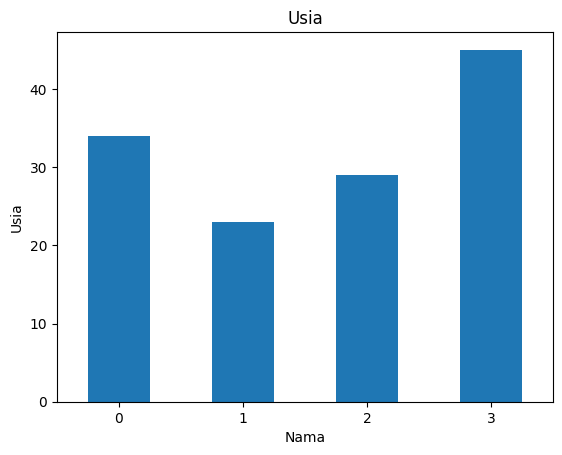

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame Pandas pertama
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame Pandas kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Menggabungkan kedua DataFrame berdasarkan kolom "Nama"
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")

# Menampilkan DataFrame hasil penggabungan
print("DataFrame setelah penggabungan:")
print(df_joined)

# Menghitung statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_pandas.describe())

# Membuat plot bar dari kolom 'Usia'
df_pandas['Usia'].plot(kind='bar', title='Usia')
plt.xlabel('Index')
plt.ylabel('Usia')
plt.xticks(rotation=0)  # Rotasi label x-axis agar tidak miring
plt.show()



1. **Membuat DataFrame Pandas Pertama**:  
   - `data_pandas`: Data tentang nama dan usia.  
   - `df_pandas`: DataFrame pertama dengan kolom "Nama" dan "Usia".

2. **Membuat DataFrame Pandas Kedua**:  
   - `data_pandas_2`: Data tentang nama dan pekerjaan.  
   - `df_pandas_2`: DataFrame kedua dengan kolom "Nama" dan "Pekerjaan".

3. **Menggabungkan DataFrame**:  
   - `pd.merge(df_pandas, df_pandas_2, on="Nama")`: Menggabungkan kedua DataFrame berdasarkan kolom "Nama".

4. **Menampilkan DataFrame Hasil Penggabungan**:  
   - `print(df_joined)` - Menampilkan DataFrame setelah penggabungan.

5. **Menghitung Statistik Deskriptif**:  
   - `df_pandas.describe()` - Menghitung statistik deskriptif (seperti count, mean, std, min, max) dari DataFrame `df_pandas`.

6. **Membuat Plot Bar**:  
   - `df_pandas['Usia'].plot(kind='bar', title='Usia')`: Membuat plot bar untuk kolom "Usia".  
   - `plt.xlabel('Index')`: Menambahkan label pada sumbu x.  
   - `plt.ylabel('Usia')`: Menambahkan label pada sumbu y.  
   - `plt.xticks(rotation=0)`: Menjaga label sumbu x tetap horizontal.  
   - `plt.show()` - Menampilkan plot.

- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

### 5. Menggabungkan PySpark dan Pandas
- **Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas**
  Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya:


- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

In [20]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Data PySpark
data_spark = [("Ali", 34, "PNS", "Renang", "Pria"), 
              ("Budi", 23, "Atlit", "Lari", "Pria"), 
              ("Citra", 29, "Guru", "Hiking", "Wanita"), 
              ("Dina", 45, "Freelancer", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, schema=columns)

# Data Pandas
data_pandas = {
    "Nama": ["Enril", "Faruzan"],
    "Usia": [23, 33],
    "Pekerjaan": ["Aktivis", "Pengacara"],
    "Hobi": ["Public Speaking", "Membaca"],
    "Gender": ["Pria", "Wanita"]
}
df_pandas = pd.DataFrame(data_pandas)

# Menggabungkan Data dari PySpark dan Pandas
df_spark_from_pandas = spark.createDataFrame(df_pandas)
df_combined = df_spark.union(df_spark_from_pandas)

# Mengonversi DataFrame PySpark ke Pandas untuk Analisis Lebih Lanjut
df_combined_pandas = df_combined.toPandas()

# Analisis: Menghitung Rata-rata Usia
average_age = df_combined_pandas["Usia"].mean()

print("DataFrame Gabungan (PySpark dan Pandas):")
print(df_combined_pandas)

print(f"\nRata-rata Usia: {average_age}")


DataFrame Gabungan (PySpark dan Pandas):
      Nama  Usia   Pekerjaan             Hobi  Gender
0      Ali    34         PNS           Renang    Pria
1     Budi    23       Atlit             Lari    Pria
2    Citra    29        Guru           Hiking  Wanita
3     Dina    45  Freelancer         Berkebun  Wanita
4    Enril    23     Aktivis  Public Speaking    Pria
5  Faruzan    33   Pengacara          Membaca  Wanita

Rata-rata Usia: 31.166666666666668



1. **Inisialisasi Spark**:  
   `findspark.init()` - Menginisialisasi Spark.  
   `SparkSession.builder.appName("BigDataPractice").getOrCreate()` - Membuat sesi Spark dengan nama aplikasi "BigDataPractice".

2. **Membuat DataFrame PySpark**:  
   `data_spark` dan `columns` - Data dan kolom untuk DataFrame PySpark.  
   `df_spark = spark.createDataFrame(data_spark, schema=columns)` - Membuat DataFrame PySpark.

3. **Membuat DataFrame Pandas**:  
   `data_pandas` - Data untuk DataFrame Pandas.  
   `df_pandas = pd.DataFrame(data_pandas)` - Membuat DataFrame Pandas.

4. **Mengonversi DataFrame dari Pandas ke PySpark**:  
   `df_spark_from_pandas = spark.createDataFrame(df_pandas)` - Mengonversi DataFrame Pandas ke DataFrame PySpark.  
   `df_combined = df_spark.union(df_spark_from_pandas)` - Menggabungkan DataFrame PySpark dari data PySpark dan Pandas.

5. **Mengonversi DataFrame PySpark ke Pandas**:  
   `df_combined_pandas = df_combined.toPandas()` - Mengonversi DataFrame PySpark yang digabungkan ke DataFrame Pandas untuk analisis lebih lanjut.

6. **Analisis Data**:  
   `average_age = df_combined_pandas["Usia"].mean()` - Menghitung rata-rata usia.

7. **Menampilkan Hasil**:  
   `print(df_combined_pandas)` - Menampilkan DataFrame gabungan.  
   `print(f"\nRata-rata Usia: {average_age}")` - Menampilkan rata-rata usia.

### 6. Konversi Data antara PySpark dan Pandas

- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [21]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Data PySpark
data_spark = [("Ali", 34, "PNS", "Renang", "Pria"), 
              ("Budi", 23, "Atlit", "Lari", "Pria"), 
              ("Citra", 29, "Guru", "Hiking", "Wanita"), 
              ("Dina", 45, "Freelancer", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, schema=columns)

# Data Pandas
data_pandas = {
    "Nama": ["Enril", "Faruzan"],
    "Usia": [23, 33],
    "Pekerjaan": ["Aktivis", "Pengacara"],
    "Hobi": ["Public Speaking", "Membaca"],
    "Gender": ["Pria", "Wanita"]
}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
print("DataFrame dari PySpark ke Pandas:")
print(df_pandas_from_spark)

print("\nDataFrame dari Pandas ke PySpark:")
df_spark_from_pandas.show()

# Menggabungkan Data dari PySpark dan Pandas
df_combined = df_spark.union(df_spark_from_pandas)

# Melakukan operasi statistik: Menghitung nilai maksimum usia
max_age = df_combined.agg({"Usia": "max"}).collect()[0][0]

print(f"\nNilai maksimum usia dari DataFrame gabungan: {max_age}")



DataFrame dari PySpark ke Pandas:
    Nama  Usia   Pekerjaan      Hobi  Gender
0    Ali    34         PNS    Renang    Pria
1   Budi    23       Atlit      Lari    Pria
2  Citra    29        Guru    Hiking  Wanita
3   Dina    45  Freelancer  Berkebun  Wanita

DataFrame dari Pandas ke PySpark:
+-------+----+---------+---------------+------+
|   Nama|Usia|Pekerjaan|           Hobi|Gender|
+-------+----+---------+---------------+------+
|  Enril|  23|  Aktivis|Public Speaking|  Pria|
|Faruzan|  33|Pengacara|        Membaca|Wanita|
+-------+----+---------+---------------+------+


Nilai maksimum usia dari DataFrame gabungan: 45


1. **Inisialisasi Spark**:
   - `findspark.init()` - Menginisialisasi Spark.
   - `SparkSession.builder.appName("BigDataPractice").getOrCreate()` - Membuat sesi Spark dengan nama aplikasi "BigDataPractice".

2. **Membuat DataFrame PySpark**:
   - `data_spark` dan `columns` - Data dan kolom untuk DataFrame PySpark.
   - `df_spark = spark.createDataFrame(data_spark, schema=columns)` - Membuat DataFrame PySpark.

3. **Membuat DataFrame Pandas**:
   - `data_pandas` - Data untuk DataFrame Pandas.
   - `df_pandas = pd.DataFrame(data_pandas)` - Membuat DataFrame Pandas.

4. **Mengonversi DataFrame dari PySpark ke Pandas**:
   - `df_pandas_from_spark = df_spark.toPandas()` - Mengonversi DataFrame PySpark ke DataFrame Pandas.

5. **Mengonversi DataFrame dari Pandas ke PySpark**:
   - `df_spark_from_pandas = spark.createDataFrame(df_pandas)` - Mengonversi DataFrame Pandas ke DataFrame PySpark.

6. **Menampilkan DataFrame Hasil Konversi**:
   - `print(df_pandas_from_spark)` - Menampilkan DataFrame Pandas hasil konversi dari PySpark.
   - `df_spark_from_pandas.show()` - Menampilkan DataFrame PySpark hasil konversi dari Pandas.

7. **Menggabungkan DataFrame**:
   - `df_combined = df_spark.union(df_spark_from_pandas)` - Menggabungkan DataFrame PySpark dari data PySpark dan data yang dikonversi dari Pandas.

8. **Operasi Statistik**:
   - `max_age = df_combined.agg({"Usia": "max"}).collect()[0][0]` - Menghitung nilai maksimum usia dari DataFrame gabungan.

9. **Menampilkan Hasil**:
   - `print(f"\nNilai maksimum usia dari DataFrame gabungan: {max_age}")` - Menampilkan nilai maksimum usia dari DataFrame gabungan.

Ini menunjukkan integrasi antara PySpark dan Pandas, serta bagaimana mengonversi, menggabungkan, dan melakukan analisis statistik pada data.